In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [171]:
data_04="/content/0.4 mm Insert radius Roughness Filtered.txt"
data_08="/content/0.8 mm Insert radius Roughness Filtered.txt"

In [172]:
data_04=pd.read_csv(data_04,sep="\t")
data_08=pd.read_csv(data_08,sep="\t")

In [173]:
data_04.head()

,Run,Radius,Depth of cut,Cutting speed,Feed rate,Ra_1,Ra_2,Ra_3,Ra MEAN
0,NaN,mm,mm,m/min,mm/rev,μm,μm,μm,μm
1,1.0,"0,4","0,05",138,"0,15","0,856","0,854","0,863","0,858"
2,2.0,"0,4","0,05",138,"0,15","1,07","1,06","1,105","1,078"
3,3.0,"0,4","0,1",107,"0,1","0,42","0,413","0,393","0,409"
4,4.0,"0,4","0,1",107,"0,1","0,563","0,562","0,549","0,558"


In [200]:
data_04 = data_04.replace(',', '.', regex=True)
data_04 = data_04.apply(pd.to_numeric, errors='ignore')
data_08 = data_08.replace(',', '.', regex=True)
data_08 = data_08.apply(pd.to_numeric, errors='ignore')


/tmp/ipython-input-525765237.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data_04 = data_04.apply(pd.to_numeric, errors='ignore')
/tmp/ipython-input-525765237.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data_08 = data_08.apply(pd.to_numeric, errors='ignore')


In [175]:
data_04.head()

,Run,Radius,Depth of cut,Cutting speed,Feed rate,Ra_1,Ra_2,Ra_3,Ra MEAN
0,NaN,mm,mm,m/min,mm/rev,μm,μm,μm,μm
1,1.0,0.4,0.05,138,0.15,0.856,0.854,0.863,0.858
2,2.0,0.4,0.05,138,0.15,1.07,1.06,1.105,1.078
3,3.0,0.4,0.1,107,0.1,0.42,0.413,0.393,0.409
4,4.0,0.4,0.1,107,0.1,0.563,0.562,0.549,0.558


In [176]:
data_08.head()

,Run,Radius,Depth of cut,Cutting speed,Feed rate,Ra_1,Ra_2,Ra_3,Ra MEAN
0,NaN,mm,mm,m/min,mm/rev,μm,μm,μm,μm
1,35.0,0.8,0.05,138,0.15,0.791,0.812,0.797,0.8
2,36.0,0.8,0.05,138,0.15,1.06,1.054,1.092,1.069
3,37.0,0.8,0.1,107,0.1,0.494,0.46,0.476,0.477
4,38.0,0.8,0.1,107,0.1,0.55,0.549,0.555,0.551


In [177]:
data_04=data_04.drop(0)


In [178]:
data_04.head()

,Run,Radius,Depth of cut,Cutting speed,Feed rate,Ra_1,Ra_2,Ra_3,Ra MEAN
1,1.0,0.4,0.05,138,0.15,0.856,0.854,0.863,0.858
2,2.0,0.4,0.05,138,0.15,1.07,1.06,1.105,1.078
3,3.0,0.4,0.1,107,0.1,0.42,0.413,0.393,0.409
4,4.0,0.4,0.1,107,0.1,0.563,0.562,0.549,0.558
5,5.0,0.4,0.1,107,0.2,1.142,1.095,1.163,1.133


In [179]:
data_08=data_08.drop(0)

In [180]:
df=pd.concat([data_04, data_08], ignore_index=True)

In [181]:
df = df[['Radius', 'Depth of cut', 'Cutting speed', 'Feed rate', 'Ra MEAN']]


In [182]:
df.head(57)

,Radius,Depth of cut,Cutting speed,Feed rate,Ra MEAN
0,0.4,0.05,138,0.15,0.858
1,0.4,0.05,138,0.15,1.078
2,0.4,0.1,107,0.1,0.409
3,0.4,0.1,107,0.1,0.558
4,0.4,0.1,107,0.2,1.133
5,0.4,0.1,107,0.2,1.185
6,0.4,0.1,169,0.2,1.156
7,0.4,0.1,169,0.2,1.14
8,0.4,0.1,169,0.1,0.64
9,0.4,0.1,169,0.1,0.561


In [183]:
df['Ra MEAN'] = df['Ra MEAN'].str.replace(',', '.')
df['Ra MEAN'] = pd.to_numeric(df['Ra MEAN'], errors='coerce')


In [184]:
df.corr()

,Radius,Depth of cut,Cutting speed,Feed rate,Ra MEAN
Radius,1.000000e+00,3.681407e-16,-1.739160e-16,9.609717e-17,-0.189280
Depth of cut,3.681407e-16,1.000000e+00,-1.727537e-16,3.005805e-17,-0.133493
Cutting speed,-1.739160e-16,-1.727537e-16,1.000000e+00,-5.819717e-17,-0.241566
Feed rate,9.609717e-17,3.005805e-17,-5.819717e-17,1.000000e+00,0.497135
Ra MEAN,-1.892801e-01,-1.334932e-01,-2.415660e-01,4.971348e-01,1.000000


<Axes: >

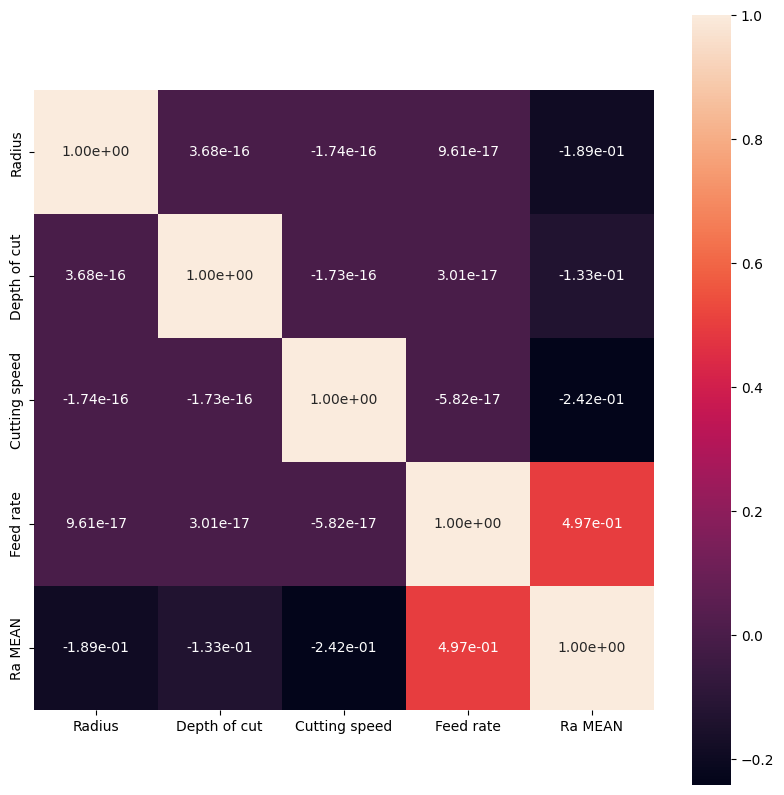

In [185]:
#constructing a heatmap
correlation=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2e',annot=True)

Checking distribution and judging whether it skewed or not

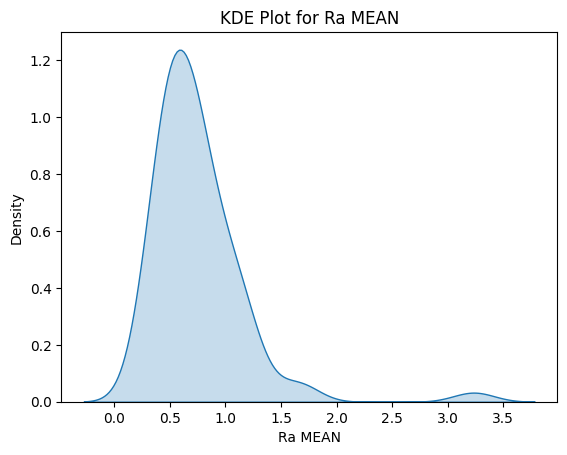

In [186]:
sns.kdeplot(df['Ra MEAN'], fill=True)
plt.title("KDE Plot for Ra MEAN")
plt.xlabel("Ra MEAN")
plt.ylabel("Density")
plt.show()

Transformation in Output Column due to right skewed

Optimal Lambda for Box-Cox: -0.4067


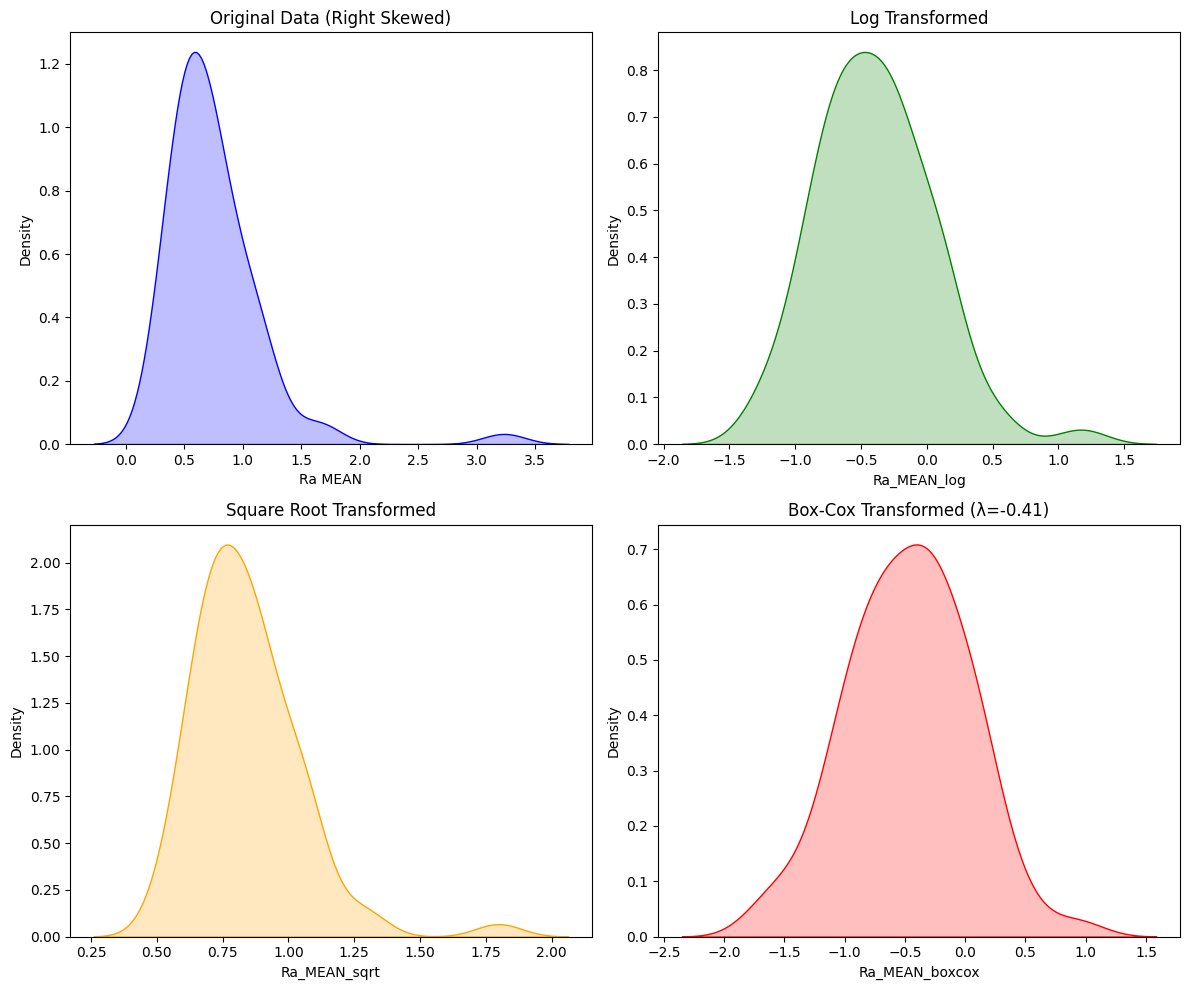

In [187]:

from scipy import stats

# 1. Log Transformation
df['Ra_MEAN_log'] = np.log(df['Ra MEAN'])

# 2. Square Root Transformation
df['Ra_MEAN_sqrt'] = np.sqrt(df['Ra MEAN'])

# 3. Box-Cox Transformation (Requires positive values > 0)
# boxcox returns a tuple: (transformed_data, best_lambda)
df['Ra_MEAN_boxcox'], best_lambda = stats.boxcox(df['Ra MEAN'])

print(f"Optimal Lambda for Box-Cox: {best_lambda:.4f}")

# --- Visualization Comparison ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original
sns.kdeplot(df['Ra MEAN'], fill=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Original Data (Right Skewed)')

# Log
sns.kdeplot(df['Ra_MEAN_log'], fill=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Log Transformed')

# Square Root
sns.kdeplot(df['Ra_MEAN_sqrt'], fill=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Square Root Transformed')

# Box-Cox
sns.kdeplot(df['Ra_MEAN_boxcox'], fill=True, ax=axes[1, 1], color='red')
axes[1, 1].set_title(f'Box-Cox Transformed (λ={best_lambda:.2f})')

plt.tight_layout()
plt.show()

In [208]:
df = df.replace(',', '.', regex=True)
df = df.apply(pd.to_numeric, errors='ignore')

/tmp/ipython-input-1010219066.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


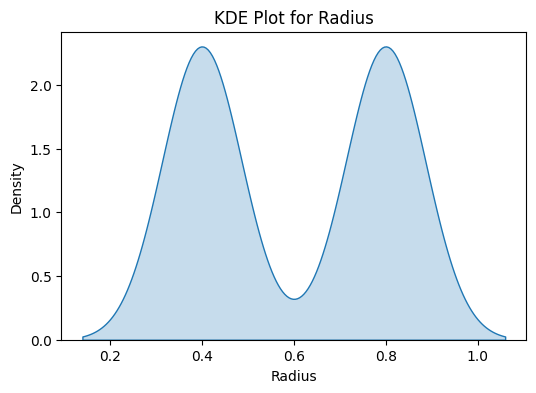

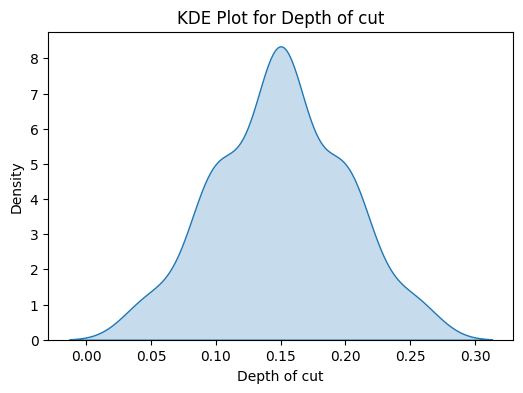

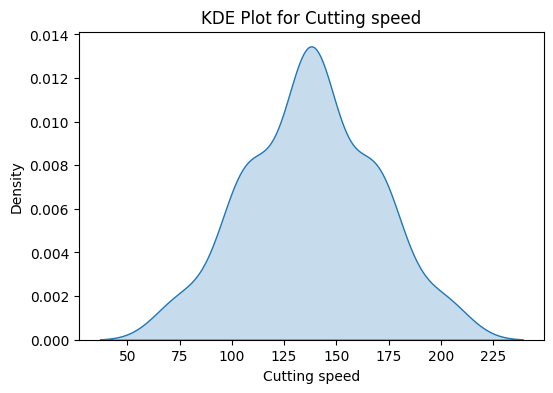

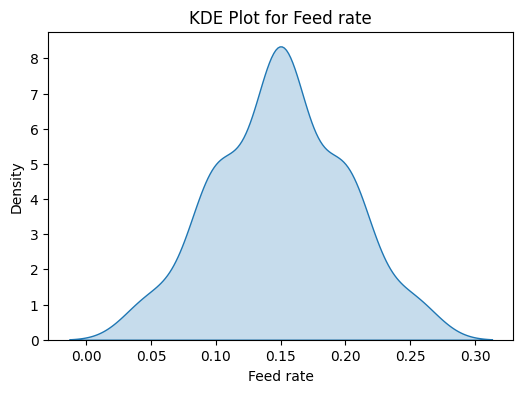

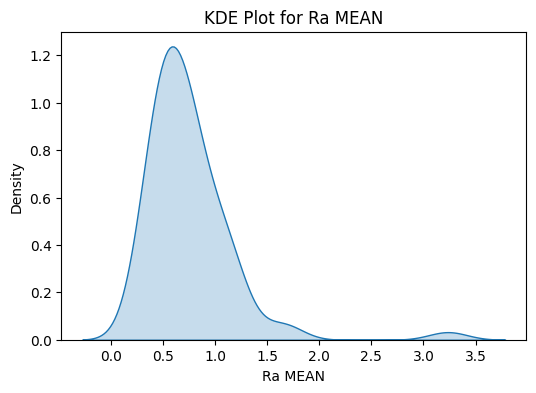

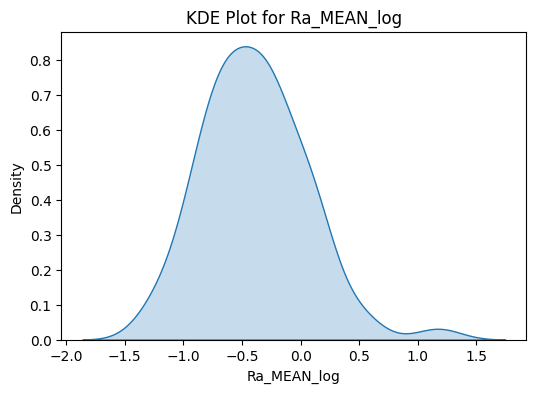

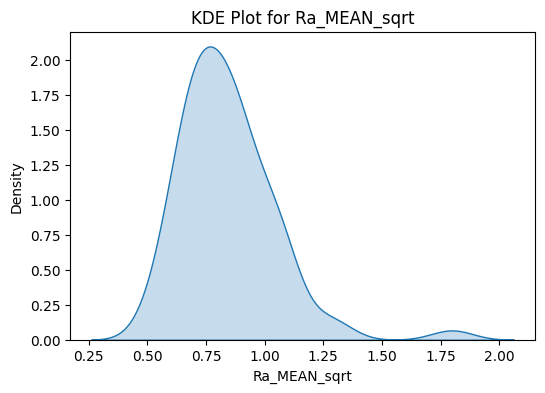

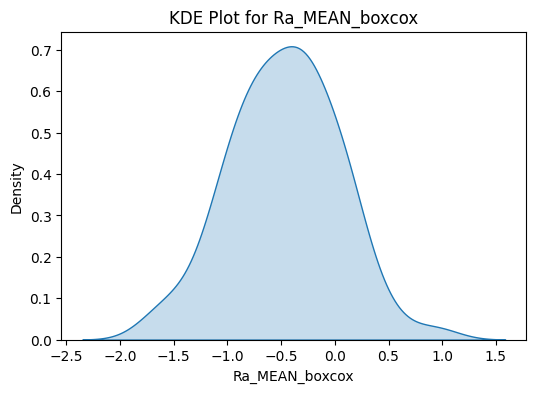

In [209]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[col], fill=True)
    plt.title(f"KDE Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

Checking for skewness

In [210]:
df.skew()


,0
Radius,0.000000
Depth of cut,0.000000
Cutting speed,0.000000
Feed rate,0.000000
Ra MEAN,3.303122
Ra_MEAN_log,0.635814
Ra_MEAN_sqrt,1.750079
Ra_MEAN_boxcox,-0.005308


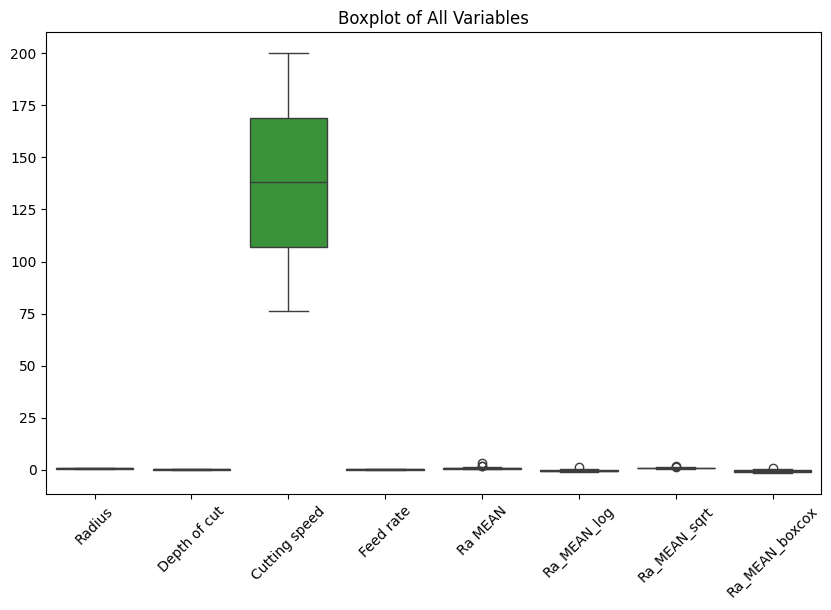

In [220]:
#Checking outlier by boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of All Variables")
plt.xticks(rotation=45)
plt.show()

In [211]:
#checking missing value
df.isnull().sum()

,0
Radius,0
Depth of cut,0
Cutting speed,0
Feed rate,0
Ra MEAN,0
Ra_MEAN_log,0
Ra_MEAN_sqrt,0
Ra_MEAN_boxcox,0


In [234]:
# Create extra columns since roughness is not linear
df['Feed_Squared'] = df['Feed rate'] ** 2
df['Theoretical_Ra'] = df['Feed_Squared'] / df['Radius']

In [235]:
df

,Radius,Depth of cut,Cutting speed,Feed rate,Ra MEAN,Ra_MEAN_log,Ra_MEAN_sqrt,Ra_MEAN_boxcox,Feed_Squared,Theoretical_Ra
0,0.4,0.05,138,0.15,0.858,-0.153151,0.926283,-0.158022,0.0225,0.056250
1,0.4,0.05,138,0.15,1.078,0.075107,1.038268,0.073972,0.0225,0.056250
2,0.4,0.10,107,0.10,0.409,-0.894040,0.639531,-1.078214,0.0100,0.025000
3,0.4,0.10,107,0.10,0.558,-0.583396,0.746994,-0.658423,0.0100,0.025000
4,0.4,0.10,107,0.20,1.133,0.124869,1.064425,0.121751,0.0400,0.100000
...,...,...,...,...,...,...,...,...,...,...
63,0.8,0.20,169,0.20,0.466,-0.763570,0.682642,-0.895422,0.0400,0.050000
64,0.8,0.20,169,0.10,0.540,-0.616186,0.734847,-0.700272,0.0100,0.012500
65,0.8,0.20,169,0.10,0.372,-0.988861,0.609918,-1.217281,0.0100,0.012500
66,0.8,0.25,138,0.15,0.367,-1.002393,0.605805,-1.237568,0.0225,0.028125


In [236]:
X=df[["Radius", "Depth of cut", "Cutting speed", "Feed rate", 'Theoretical_Ra', 'Feed_Squared'] ]
Y=df['Ra_MEAN_boxcox']

In [237]:
#Since there is very small outliers we can remove it by cook's distance
import statsmodels.api as sm
X = sm.add_constant(X)

# Step 2: Fit the model
model = sm.OLS(Y, X).fit()
# Cook's distance
cooks_d = model.get_influence().cooks_distance[0]

# Outliers (threshold = 4/n)
outliers = np.where(cooks_d > 4/len(df))[0]

# Remove outliers
df_clean = df.drop(outliers).reset_index(drop=True)

print("Outliers:", outliers)

Outliers: [13 44 60]


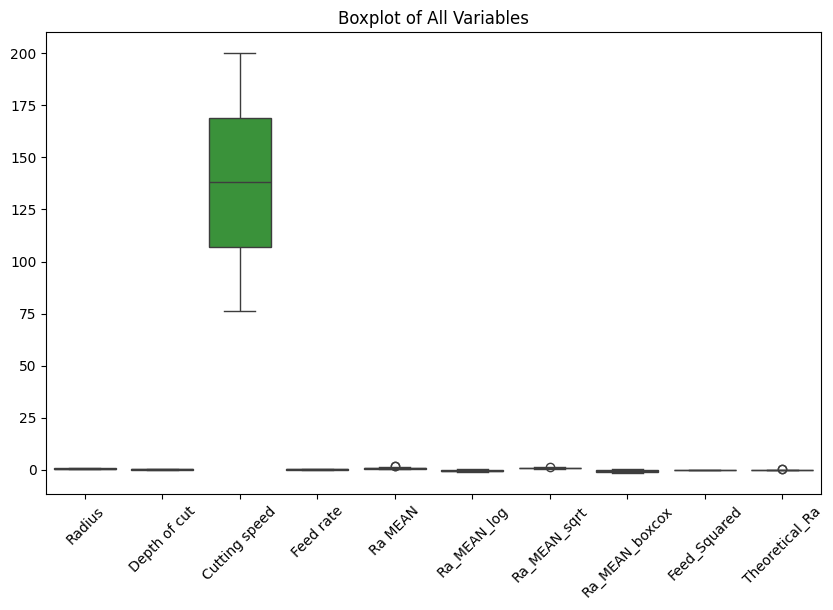

In [261]:
#rechecking the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean)
plt.title("Boxplot of All Variables")
plt.xticks(rotation=45)
plt.show()

In [238]:
X1=df_clean[["Radius", "Depth of cut", "Cutting speed", "Feed rate", 'Theoretical_Ra', 'Feed_Squared'] ]
Y1=df_clean['Ra_MEAN_boxcox']

In [239]:
X1_train, X1_test, Y1_train, Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=2)

In [240]:
lr=LinearRegression()
lr.fit(X1_train,Y1_train)

LinearRegression()

In [241]:
Y1_pred=lr.predict(X1_test)

In [242]:
combine=pd.DataFrame({'Actual':Y1_test,'Predicted':Y1_pred})
combine

,Actual,Predicted
0,-0.158022,-0.054382
28,0.085570,-0.068006
62,-1.217281,-1.153707
29,-1.000381,-0.960633
23,-0.860917,-0.905285
10,-0.291811,-0.263154
30,-0.913147,-0.960633
51,-0.642658,-0.646864
36,-0.674469,-0.834239
32,-0.257205,-0.582622


In [264]:
print("MAE", mean_absolute_error(Y1_test,Y1_pred))
print("MSE", mean_squared_error(Y1_test,Y1_pred))
print("RMSE", np.sqrt(mean_squared_error(Y1_test,Y1_pred)))
print("R2", r2_score(Y1_test,Y1_pred))
r2=r2_score(Y1_test,Y1_pred)
print("r2_adjucant",1- (1-r2)*(len(X1_test)-1)/(len(X1_test)-X1_test.shape[1]-1))

MAE 0.10290488744854336
MSE 0.01744443006916259
RMSE 0.132077363954474
R2 0.9190726919442362
r2_adjucant 0.8381453838884725


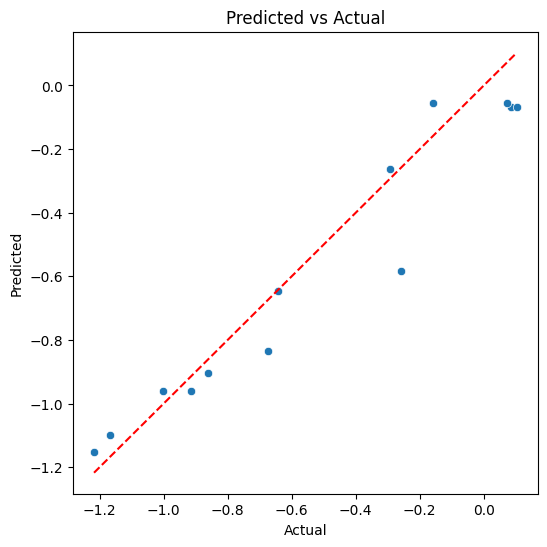

In [265]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=Y1_test, y=Y1_pred)
plt.plot([Y1_test.min(), Y1_test.max()], [Y1_test.min(), Y1_test.max()], 'r--')  # diagonal line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

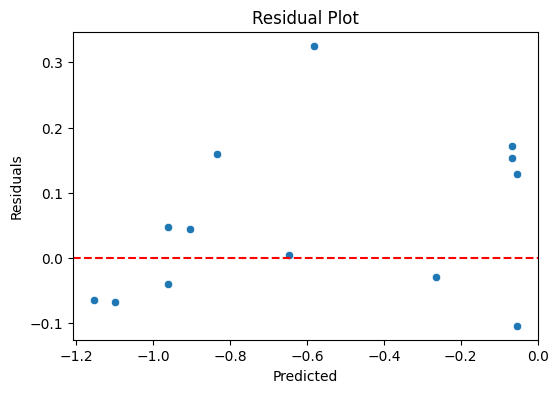

In [266]:
#Residual plot

residuals = Y1_test - Y1_pred
plt.figure(figsize=(6,4))
sns.scatterplot(x=Y1_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

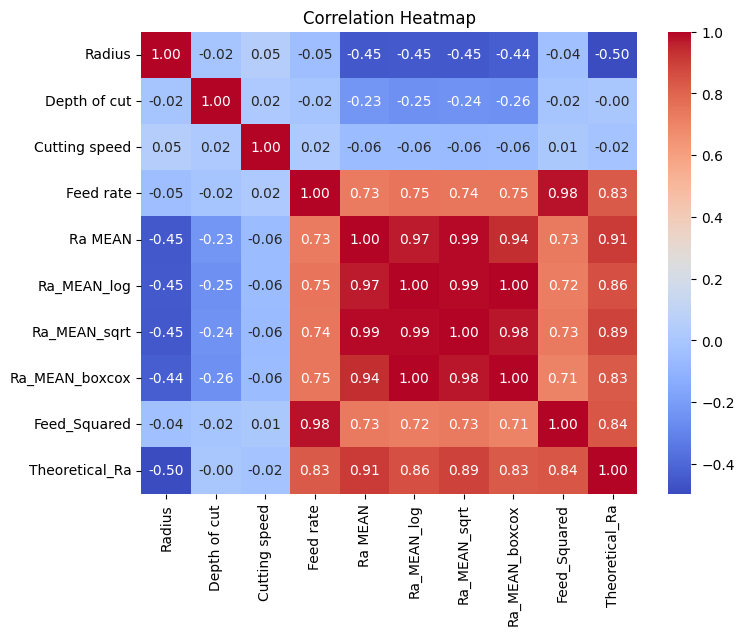

In [267]:
 #Correlation heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [268]:
import statsmodels.api as sm

X1_train_sm = sm.add_constant(X1_train)
model_sm = sm.OLS(Y1_train, X1_train_sm).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:         Ra_MEAN_boxcox   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     30.94
Date:                Mon, 08 Dec 2025   Prob (F-statistic):           2.04e-14
Time:                        14:57:30   Log-Likelihood:                 7.2945
No. Observations:                  52   AIC:                           -0.5891
Df Residuals:                      45   BIC:                             13.07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.3780      0.353     -3.